# Parametric model of plate with multiple holes

### Objective:
In this example we'll setup a parametric model in PyMAPDL for a rectangular plate with multiple holes. The model is setup such that one can change the dimensions of the plate, the number of holes and their radius, the material properties and the pressure applied.

The learning objectives of this demo are:
* Launch PyMAPDL on a local machine
* Setup and solve a parametric model using PyMAPDL
* Interactive plotting of CAD, mesh, and results in Pythonic interface.

### Model Details
<div>
    <img src="attachment:plate_with_hole.png" width="500"/>
</div>

#### Model parameters:
* Length, width and depth of the plate
* Number of holes
* Raidus of the holes
* Material properties (Young's modulus and Poisson's ratio)
* Applied pressure

## Step 1 - define all parameters

In [10]:
# All units in (m, Kg, s)
LENGTH = 5
WIDTH = 2.5
DEPTH = 0.1
RADIUS = 0.5
NUM = 3

E = 2e11
NU = 0.27

PRESSURE = 1000

# Step 2 - launch MAPDL and create geometry

[82, 87, 110]


c:\Users\Student\Desktop\ANSYS-Asymmetric-Modes-Identifier\pymapdl-env\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

Please install `ipywidgets`.

Falling back to a static output.
  warnings.warn(


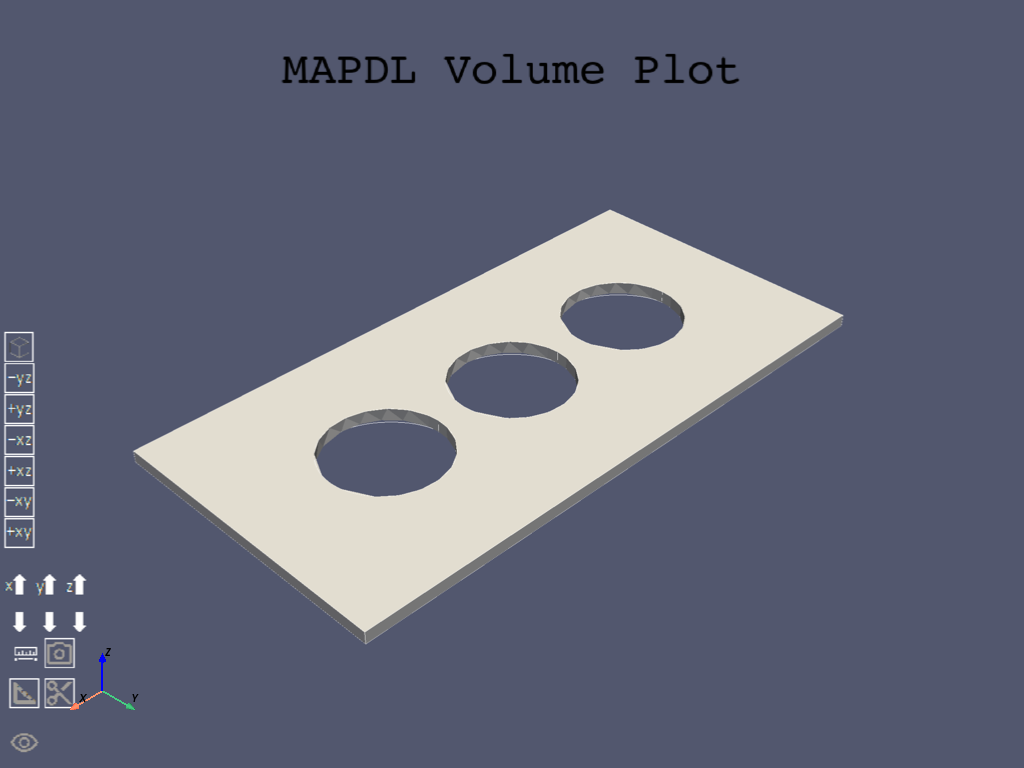

In [11]:
from ansys.mapdl.core import launch_mapdl
mapdl = launch_mapdl()

mapdl.clear()
mapdl.prep7()
mapdl.block(0, LENGTH, 0, WIDTH, 0, DEPTH)
for i in range(1,NUM+1):
    mapdl.cyl4(i*LENGTH/(NUM+1),WIDTH/2,RADIUS,'','','',2*DEPTH)
mapdl.vsbv(1,'all')
mapdl.vplot('all')

## Step 3 - define material properties, mesh attributes and generate mesh.

[82, 87, 110]


c:\Users\Student\Desktop\ANSYS-Asymmetric-Modes-Identifier\pymapdl-env\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

Please install `ipywidgets`.

Falling back to a static output.
  warnings.warn(


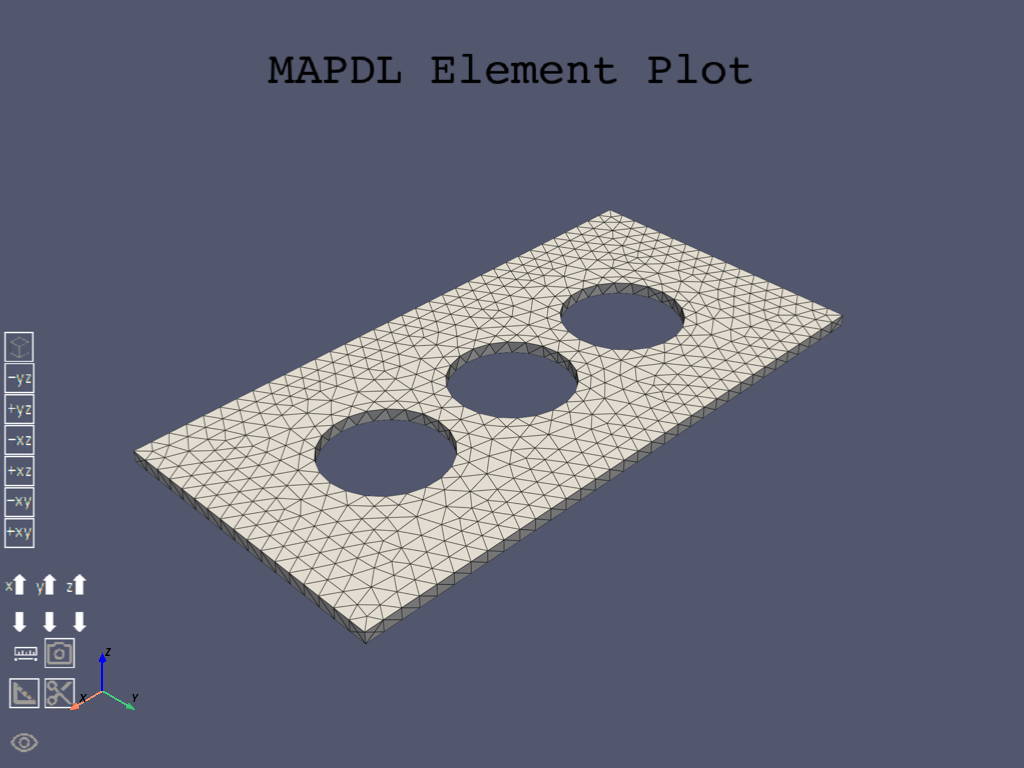

In [12]:
mapdl.lesize("ALL", 0.15, layer1=1)

mapdl.mp('ex',1,E)
mapdl.mp('nuxy',1,NU)

mapdl.et(1,'SOLID186')
mapdl.mshape(1, "3D")
mapdl.mshkey(0)
mapdl.vmesh('all')
mapdl.eplot()

## Step 4 - apply loads and boundary conditions

In [13]:
mapdl.nsel('s','loc','x',0)
mapdl.d('all','all',0)

mapdl.nsel('s','loc','x', LENGTH)
mapdl.sf('all','pres',PRESSURE)

mapdl.allsel()
mapdl.finish()

***** ROUTINE COMPLETED *****  CP =         0.000

## Step 4 - solve the static problem

In [14]:
mapdl.slashsolu()
mapdl.solve()
mapdl.finish()

FINISH SOLUTION PROCESSING


 ***** ROUTINE COMPLETED *****  CP =         0.000

In [15]:
# enter the solver routine and solve 
mapdl.slashsolu()
output = mapdl.solve()

print(output)

*****  MAPDL SOLVE    COMMAND  *****

 *** NOTE ***                            CP =       0.000   TIME= 00:00:00
 There is no title defined for this analysis.                            

 *** SELECTION OF ELEMENT TECHNOLOGIES FOR APPLICABLE ELEMENTS ***
                ---GIVE SUGGESTIONS ONLY---

 ELEMENT TYPE         1 IS SOLID186. KEYOPT(2) IS ALREADY SET AS SUGGESTED.


   *****MAPDL VERIFICATION RUN ONLY*****
     DO NOT USE RESULTS FOR PRODUCTION

                       S O L U T I O N   O P T I O N S

   PROBLEM DIMENSIONALITY. . . . . . . . . . . . .3-D                  
   DEGREES OF FREEDOM. . . . . . UX   UY   UZ  
   ANALYSIS TYPE . . . . . . . . . . . . . . . . .STATIC (STEADY-STATE)
   GLOBALLY ASSEMBLED MATRIX . . . . . . . . . . .SYMMETRIC  

 *** NOTE ***                            CP =       0.000   TIME= 00:00:00
 Present time 0 is less than or equal to the previous time.  Time will   
 default to 1.                                                           

 *** N

## Step 5 - plot the stress contours for the model

c:\Users\Student\Desktop\ANSYS-Asymmetric-Modes-Identifier\pymapdl-env\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

Please install `ipywidgets`.

Falling back to a static output.
  warnings.warn(


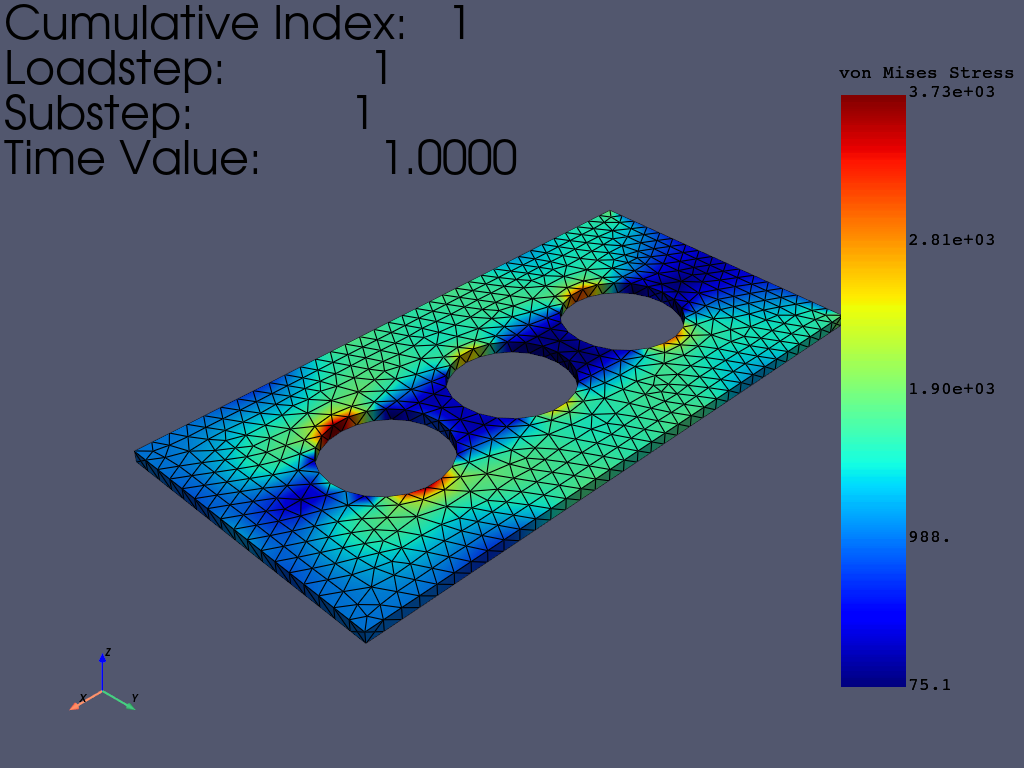

In [16]:
result = mapdl.result
result.plot_principal_nodal_stress(0,'seqv',background='w',show_edges=True,text_color='k',add_text=True)

## Step 6 - exit MAPDL

In [17]:
mapdl.exit()